https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

## Predict The Flight Ticket Price Hackathon

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
big_df=train_df.append(test_df, sort=False)

In [6]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


# Data cleaning

In [9]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0].astype(int)
big_df['Month']=big_df['Date_of_Journey'].str.split('/').str[1].astype(int)
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2].astype(int)
big_df=big_df.drop(['Date_of_Journey'],axis=1)
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [10]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [11]:
big_df['Arrival_Time']=big_df['Arrival_Time'].str.split(' ').str[0]

In [12]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [13]:
big_df['Total_Stops'].isnull().sum()

1

In [14]:
big_df[big_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [15]:
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [16]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stop')

In [17]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
big_df['Stop'] = big_df['Total_Stops'].str.split(' ').str[0].astype(int)
big_df.drop(['Total_Stops'],1,inplace=True)

In [19]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [20]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                 int32
dtype: object

In [21]:
big_df['Arrival_Hour'] = big_df['Arrival_Time'] .str.split(':').str[0].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Time'] .str.split(':').str[1].astype(int)
big_df=big_df.drop(['Arrival_Time'],axis=1)

In [22]:
big_df['Departure_Hour'] = big_df['Dep_Time'] .str.split(':').str[0].astype(int)
big_df['Departure_Minute'] = big_df['Dep_Time'] .str.split(':').str[1].astype(int)
big_df=big_df.drop(['Dep_Time'],axis=1)

In [23]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [24]:
big_df['Route']

0                   BLR → DEL
1       CCU → IXR → BBI → BLR
2       DEL → LKO → BOM → COK
3             CCU → NAG → BLR
4             BLR → NAG → DEL
                ...          
2666          CCU → DEL → BLR
2667                CCU → BLR
2668          DEL → BOM → COK
2669          DEL → BOM → COK
2670          DEL → BOM → COK
Name: Route, Length: 13354, dtype: object

In [25]:
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

big_df['Route_1'].fillna("None",inplace=True)
big_df['Route_2'].fillna("None",inplace=True)
big_df['Route_3'].fillna("None",inplace=True)
big_df['Route_4'].fillna("None",inplace=True)
big_df['Route_5'].fillna("None",inplace=True)

In [26]:
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [27]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [28]:
big_df=big_df.drop(['Route'],axis=1)
big_df=big_df.drop(['Duration'],axis=1)

In [29]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [30]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [31]:
big_df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
#read: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df["Airline"]=encoder.fit_transform(big_df['Airline'])
big_df["Source"]=encoder.fit_transform(big_df['Source'])
big_df["Destination"]=encoder.fit_transform(big_df['Destination'])
big_df["Additional_Info"]=encoder.fit_transform(big_df['Additional_Info'])
big_df["Route_1"]=encoder.fit_transform(big_df['Route_1'])
big_df["Route_2"]=encoder.fit_transform(big_df['Route_2'])
big_df["Route_3"]=encoder.fit_transform(big_df['Route_3'])
big_df["Route_4"]=encoder.fit_transform(big_df['Route_4'])
big_df["Route_5"]=encoder.fit_transform(big_df['Route_5'])

In [33]:
big_df['Airline'].value_counts()

4     4746
3     2564
1     2192
6     1543
8     1026
10     608
0      405
2      240
7       16
5        8
11       5
9        1
Name: Airline, dtype: int64

In [34]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


## Feature selection

In [35]:
#read: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [36]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [37]:
df_train=big_df[0:10683]
df_test=big_df[10683:]

In [38]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [40]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [41]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [42]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [43]:
selected_features=X_train.columns[(model.get_support())]

In [44]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [45]:
X_train=X_train.drop(['Year'],axis=1)

In [46]:
X_test=X_test.drop(['Year'],axis=1)

## Random Forest Regressor

In [47]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [50]:
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [52]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [53]:
rf_best = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='auto', max_depth=20)

In [54]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
pred=rf_best.predict(X_test)

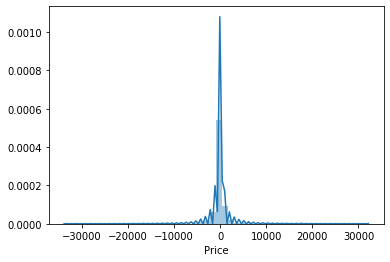

In [56]:
import seaborn as sns

sns.distplot(y_test-pred)

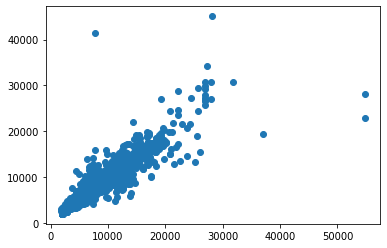

In [63]:
plt.scatter(y_test,pred)